# 7. Model Selection

### Objectives
* Learn how to automate hyperparmater tuning with `GridSearchCV`

## Automating Hyperparameter Tuning
Instead of manually tuning hyperparameters, we can automate the process with the Scikit-Learn **meta-estimator** named **`GridSearchCV`**. 

### Meta-Estimator?
**`GridSearchCV`** is not a machine learning model by itself though it is similar to all the other Scikit-Learn estimators. We must pass it the estimator we would like to tune along with a dictionary containing all the possible values we would like it to search.

## Map hyperparameter name to possible values with a dictionary
To use **`GridSearchCV`**, you must create a Python dictionary that uses hyperparameter string names as the keys that map to a list/array of the possible values you want it to search. 

Let's import it and then create a dictionary containing two parameters we would like to search.

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [12]:
heart = pd.read_csv('../data/heart.csv')
heart.head()

,age,sex,chest_pain,rest_bp,chol,fbs,rest_ecg,max_hr,exang,old_peak,slope,ca,thal,disease
0,63,Male,typical,145,233,1,left ventricular hypertrophy,150,0,2.3,3,0.0,fixed,0
1,67,Male,asymptomatic,160,286,0,left ventricular hypertrophy,108,1,1.5,2,3.0,normal,1
2,67,Male,asymptomatic,120,229,0,left ventricular hypertrophy,129,1,2.6,2,2.0,reversable,1
3,37,Male,nonanginal,130,250,0,normal,187,0,3.5,3,0.0,normal,0
4,41,Female,nontypical,130,204,0,left ventricular hypertrophy,172,0,1.4,1,0.0,normal,0


In [30]:
X = heart[['max_hr', 'rest_bp']].values
y = heart['disease'].values

from sklearn.model_selection import GridSearchCV

depths = np.arange(1, 15)
splits = np.arange(2, 10)

param_grid = {'max_depth': depths, 
              'min_samples_split': splits}

## Instantiate estimator and then instantiate `GridSearchCV` with cross validation
The estiator passed to `GridSearchCV` must also be instantiated. You may supply it a cross validation splitter as well.

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5)

gs = GridSearchCV(dtc, param_grid=param_grid, cv=sss)

## Execute the exhaustive grid search
Every single combination of variables supplied to the parameter grid will be tested when the `fit` method is called. Cross validation will be conducted for each combination as well.

In [32]:
# Will take some time, be patient
gs.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=None, test_size='default',
            train_size=None),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Get results from our grid search object
The best hyperparmeters are stored in the `best_params_` object.

In [33]:
gs.best_params_

{'max_depth': 1, 'min_samples_split': 2}

### All results are stored in `cv_results_` attribute
The **`cv_results_`** is a dictionary containing a massive amount of result data from the grid search. It has data on the time it took to fit the model, time it took to score the model, the scores on each cross validated section, and more. We can convert it to a Pandas DataFrame to make it easier to read.

In [34]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000442,0.000224,0.000241,1.943157e-05,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
1,0.000330,0.000015,0.000231,4.174436e-06,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
2,0.000322,0.000001,0.000226,0.000000e+00,1,4,"{'max_depth': 1, 'min_samples_split': 4}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
3,0.000323,0.000003,0.000227,1.016010e-06,1,5,"{'max_depth': 1, 'min_samples_split': 5}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
4,0.000326,0.000001,0.000227,1.237941e-06,1,6,"{'max_depth': 1, 'min_samples_split': 6}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
5,0.000323,0.000009,0.000226,8.920806e-07,1,7,"{'max_depth': 1, 'min_samples_split': 7}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
6,0.000329,0.000007,0.000228,7.478899e-07,1,8,"{'max_depth': 1, 'min_samples_split': 8}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
7,0.000362,0.000048,0.000245,2.300639e-05,1,9,"{'max_depth': 1, 'min_samples_split': 9}",0.774194,0.774194,0.677419,...,0.703226,0.071842,1,0.702206,0.702206,0.713235,0.724265,0.709559,0.710294,0.008188
8,0.000388,0.000013,0.000243,6.885304e-06,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.709677,0.774194,0.645161,...,0.696774,0.048279,9,0.720588,0.713235,0.727941,0.727941,0.724265,0.722794,0.005502
9,0.000368,0.000017,0.000233,4.830904e-06,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.709677,0.774194,0.645161,...,0.696774,0.048279,9,0.720588,0.713235,0.727941,0.727941,0.724265,0.722794,0.005502


## Getting the best trained estimator back
You don't have to retrain the model after you know what the best parameters are. The **`GridSearchCV`** object provides you the best estimator with the **`best_estimator_`** attribute.

In [35]:
dtc_best_gs = gs.best_estimator_
dtc_best_gs

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## The best estimator is already trained on the full dataset
The best estimator that gets returned has been fit on ALL of the training data.

## Grid searching is computationally expensive. Search area can explode
Grid searching is doing a tremendous amount of work. It searches all combinations of the hyperparameter space that you supply it with. This alone can add up quickly. If you have 10 choices of values for each of 3 different hyperparameters, the grid search would have to run 1,000 different models.

Additionally, the grid search is doing cross validation (that's why its name ends in **`CV`**). You can easily create several hours of work for your machine with a fairly simple grid search.

One idea to limit computation time is to limit your grid searching to a smaller subset of the hyperparameters. Optimize them first and then run another grid search with those newly optimized hyperparameters set. Here is an example where we set the `max_depth` during the decision tree instantiation and then do a grid search with just `min_samples_split`.

In [38]:
dtc = DecisionTreeClassifier(max_depth=3)

In [39]:
param_grid = {'min_samples_split': splits}

In [40]:
gs1 = GridSearchCV(dtc, param_grid=param_grid)
gs1.fit(X, y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

# Hyperparameter tuning is helpful but not the most important thing
The biggest gains with parameter tuning usually happen in the beginning. It then becomes harder and harder to improve the model after these initial gains. Your searches might become more and more granular for less and less gain. 

For most applications, finding hyperparameters that are close enough to the best possible choice is usually good enough.

# More
* You can parallelize the grid search to speed up the operations by setting **`n_jobs=-1`** during **`GridSearchCV`** instantiation.
* Use the **`RandomizedSearchCV`** instead which will randomly sample the hyperparameter space. Read about the [comparison to grid search][1]. It can save lots of time and yield nearly as good results. By default, it searches 10 combinations.

[1]: http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py

# Exercises

### Problem 1
<span  style="color:green; font-size:16px">Use grid search to find the best parameters for a random
forest model.</span>

### Problem 2
<span  style="color:green; font-size:16px">Choose a number of different numeric columns to add to your model. Again do a grid search to find the best set of parameters.</span>

# Extra: Visualizing the decision tree
Run the following command in the terminal `pip install --user graphviz`

In [66]:
from sklearn.tree import export_graphviz
import graphviz

In [67]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf='deprecated', min_samples_split=2,
            min_weight_fraction_leaf='deprecated', presort=False,
            random_state=None, splitter='best')

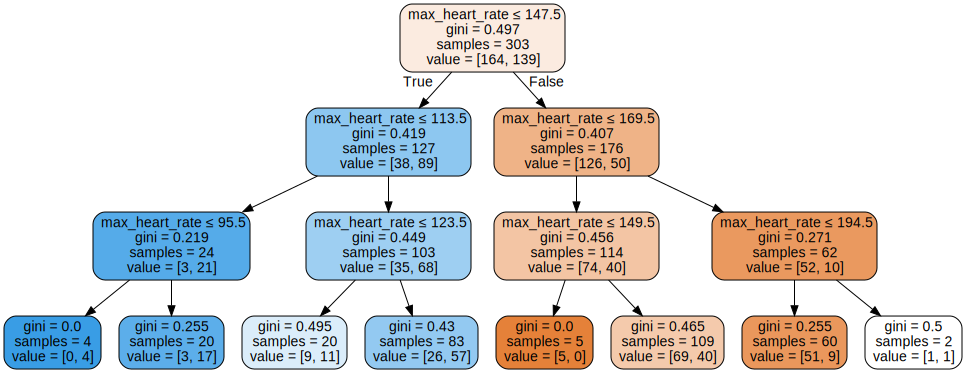

In [68]:
dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=['max_heart_rate'],
                           filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 